<a href="https://colab.research.google.com/github/BASELMAAROF/Feature_Engineering/blob/Master/Feature_Engineering_Missing_Values_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Random Sample Imputation 

Aim: Random simple imputation consists of taking random observation from the dataset and we use this observation to replace the Nan values.

When should it be used?
It assumes that the data are missing completely at random(MCAR)

In [6]:
import pandas as pd 
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [7]:
df 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
df['Age'].isnull().sum()

177

In [39]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [55]:
df[df['Age'].isnull()].index 

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [59]:
def impute_nan(df,variable,median):
  df[variable+'_median']=df[variable].fillna(median)
  df[variable+'_random']=df[variable]
  ##It will have the random sample to fill na 
  random_sample = df[variable].dropna().sample(df['variable'].isnull().sum(), random_state=0)
  ##pandas need to have some index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [60]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [61]:
import matplotlib.pyplot as plt

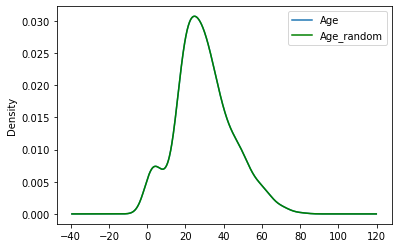

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde' , ax=ax)
df.Age_random.plot(kind = 'kde', ax=ax , color= 'green')
lines, lables =ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

#### Advantages 
1. Esay To Implement 
2. There is no disturbution in variance 

#### Disadvantge 
1. Every situation randomness wont work 

#### Capturing Nan Values with a new feature

It works well if the data are not missing
completey at random 



In [71]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [73]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [75]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [78]:
df.Age.median()

28.0

In [82]:
df['Age'].fillna(df.Age.median(), inplace= True)

In [85]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages 
1. Esay To Implement 
2. Captures the importance of missing values 

#### Disadvantages
1.  Creating Additional features(curse of Dimensionality)


#### End of Distribution imputation




In [89]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


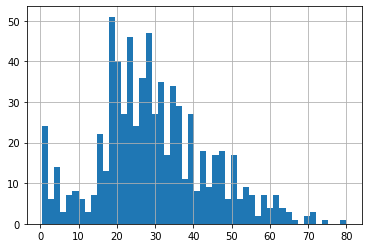

In [91]:
df.Age.hist(bins=50)

In [90]:
df.Age.mean()

29.69911764705882

In [102]:
extreme = df.Age.mean()+3*df.Age.std()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


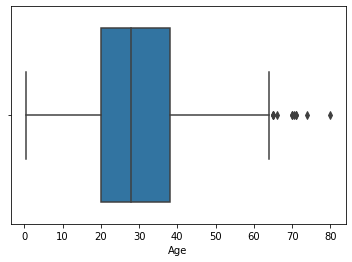

In [103]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [109]:
def impute_nan(df,variable,median,extreme):
  df[variable+'_end_destirbution']=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)


In [110]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [111]:
df.head()

,Survived,Age,Fare,Age_end_destirbution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


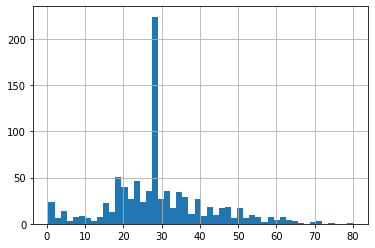

In [113]:
df['Age'].hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


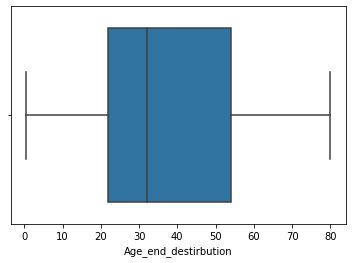

In [114]:
sns.boxplot('Age_end_destirbution',data=df)

#### Advantages 
1. Easy to Emplement 
2. Captures the importance o misiingness if there is one 

#### Disadvanteges 
1. Distorts the original distirbution of the variable 
2. If misiginess is not important ,it may mask the predictive power of the original varible by distoring its distirbution 
3.  If the number of NA is big, it will be mask true outliers in the distrbution 
4. If number of NA value is small, the replaced NA maybe conisdered an outliers and pre-processcing  in a subsequent 
feature engineering